In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [13]:
data = np.load('C:/project/16B-PROJECT/Data/model_pca.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [14]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']
print(mean)

[0.37474073 0.37083164 0.36647215 ... 0.36850471 0.36963229 0.37192178]


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((3016, 50), (754, 50), (3016,), (754,))

# Training a Machine Learning Model

In [18]:
from sklearn.svm import SVC

In [33]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [34]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [35]:
# score
model.score(x_train,y_train)

0.8776525198938993

In [36]:
# score
model.score(x_test,y_test)

0.8143236074270557

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score


In [25]:
from sklearn import metrics

In [38]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

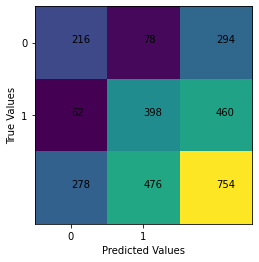

In [39]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [40]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.776978,0.734694,0.755245,294.000000
female,0.836134,0.865217,0.850427,460.000000
accuracy,0.814324,0.814324,0.814324,0.814324
macro avg,0.806556,0.799956,0.802836,754.000000
weighted avg,0.813068,0.814324,0.813314,754.000000


In [41]:
#kappa score
metrics.cohen_kappa_score(y_test,y_pred)

0.6058605651472608

In [42]:
model_tune=SVC()


In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }


In [44]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [18]:
model_grid.fit(X,y)

NameError: name 'model_grid' is not defined

In [46]:
model_grid.best_params_


{'C': 1, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [17]:
model_grid.best_score_

NameError: name 'model_grid' is not defined

In [19]:
model_best = SVC(C=10,kernel='rbf',gamma=0.01,probability=True)

In [20]:
model_best.fit(x_train,y_train)

SVC(C=10, gamma=0.01, probability=True)

In [21]:
model_best.score(x_train,y_train)

0.9807692307692307

In [22]:
model_best.score(x_test,y_test)

0.8236074270557029

In [23]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

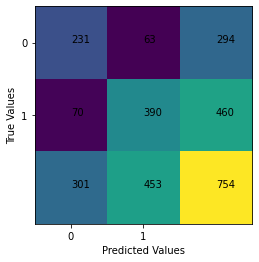

In [26]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [27]:
import pickle
pickle.dump(model_best,open('C:/project/16B-PROJECT/Data/model_svm.pickle','wb'))
pickle.dump(mean,open('C:/project/16B-PROJECT/Data/mean.pickle','wb'))